# Color blind Type
## Monochromacy: Grey shades
## Dichromacy:
###     1) Protanopia: L-cones are missing  -> Inability to see Red color (Red Blind)
###     2) Duteranopia: M-cones are missing -> Inability to see Green color (Green Blind)
###     3) Tritanopia: S-cones are missing  -> Inability to see Blue color (Blue Blind)

## Anomalous Trichromacy
### 1) Protanomaly: L-cones are not aligned   -> Less sensitivity to Red color (Red week)
### 2) Dueteranomaly: M-cones are not aligned -> Less sensitivity to Green color (Green week)
### 3) Tritanomaly: S-cones are not aligned   -> Less sensitivity to Blue color (Blue week)

#  Implemented algorithms 
### Protanopia LMS Daltonization & CBFS
### Duteranopia LMS Daltonization & LAB adjustment
### Tritanopia LMS Daltonization & Shifting colors

In [1]:
## Carga de librerias
import cv2 #openCV open computr vision
import numpy as np # numeric python
from matplotlib import pyplot as plt
import math
import random
import time

In [2]:
def cargar(direccion):
    img = cv2.imread(direccion) #cargamos la imagen de la  direccion dada
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

def show(imagen):
    plt.figure()
    plt.imshow(imagen)
    plt.axis('off')
    plt.show() #Mostramos el plot
    pass

# Algorithm 2: Color-Blind Filter Service

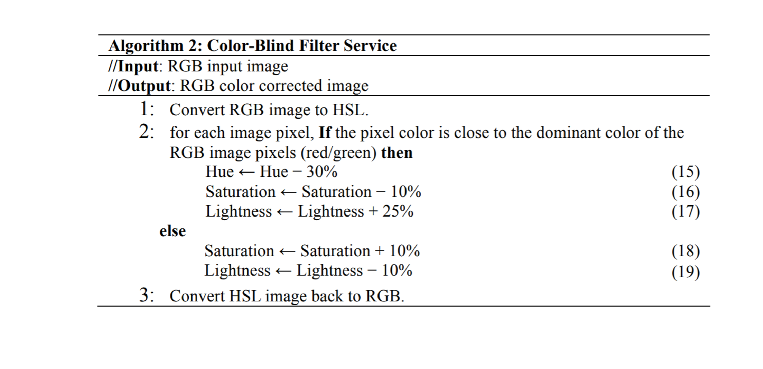

In [3]:
show(cargar('Dataset/algorithm2.PNG'))

In [4]:
def imageRGBToHSL(image):
    img = np.copy(image)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            d=0
            h=l=s=0
            R,G,B = img[n][m]/255
            minimo = np.amin([R,G,B])
            maximo = np.amax([R,G,B])
            d = maximo - minimo
            #light
            l = (maximo+minimo)/2
            # excepcion
            if d == 0.0:
                h = 0
                s = 0
            #hue
            elif maximo == R:
                h = 60*((G-B)/d % 6)
            elif maximo == G:
                h = 60*((B-R)/d)+120
            elif maximo == B:
                h = 60*((R-G)/d)+240
            #saturate
            if 0 <l <= 0.5 :
                s = (d/(maximo+minimo))
            elif l > 0.5 :
                s = (d/(2 - (maximo+minimo)))
            s=s*100
            l=l*100
            img[n][m] = np.array([h,s,l])
    return img


In [5]:
def DominationColor(rgb, hsl, k):
    img = np.copy(hsl)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            k = 0 #proximidad
            h,s,l = img[n][m]
            p=img[n][m]
            ratio1 = p[0]/p[1] #rojo/verde
            ratio2 = p[2]/p[1] #azul/verde
            if ratio1 >ratio2:
                h = 0.7*h
                s = 0.9*s
                l = 1.25*l
            else:
                s = 1.1*s
                l = 0.9*l
            img[n][m]=np.array([h,l,s])
    return img


In [6]:
def imageHSLToRGB(image):
    img = np.copy(image)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            h,s,l = img[n][m]
            s=s/100
            l=l/100
            c=x=M=0
            R=G=B=0
            r,g,b = [0,0,0]
            c = (1-math.fabs(2*l-1))*s
            x = c * (1 - math.fabs( (h/60) % 2 -1))
            M = l - c/2
            if 0 <= h < 60:
                r,g,b = [c,x,0]
            elif 60 <= h < 120:
                r,g,b = [x,c,0]
            elif 120 <= h < 180:
                r,g,b = [0,c,x]
            elif 180 <= h < 240:
                r,g,b = [0,x,c]
            elif 240 <= h < 300:
                r,g,b = [x,0,c]
            elif 300 <= h < 360:
                r,g,b = [c,0,x]
            R = (r+M)*255
            G = (g+M)*255
            B = (b+M)*255
            img[n][m] = np.array([R,G,B])
    return img

In [7]:
def testColorBlind(nombre,k):
    rgb = cargar(nombre)
    hsl = imageRGBToHSL(rgb)
    dc = DominationColor(rgb,hsl,k)
    rgb2 = imageHSLToRGB (dc)
    show(rgb)
#     show(hsl)
#     show(dc)
    show(rgb2)


/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in ubyte_scalars
/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in ubyte_scalars


/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in ubyte_scalars


/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in ubyte_scalars


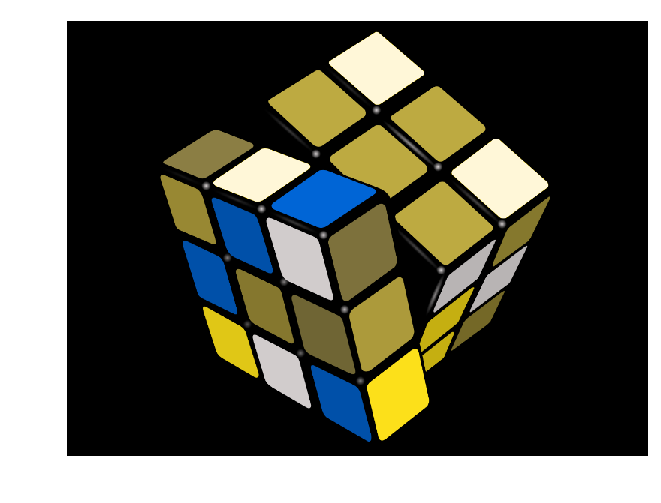

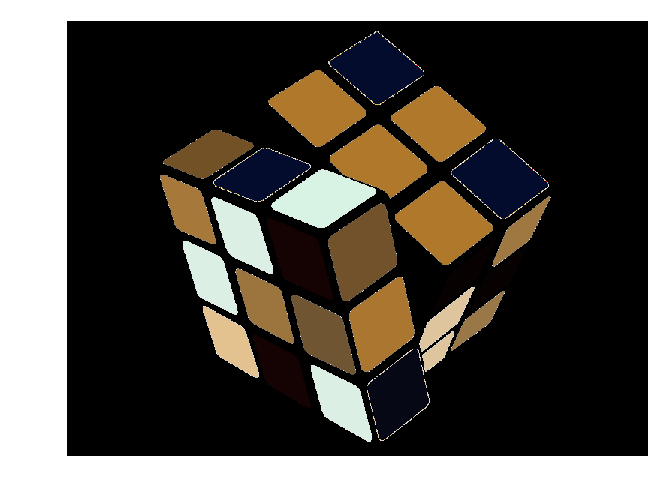

In [8]:
testColorBlind('Dataset/pdi3-proto.png',70)

/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars


/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in ubyte_scalars
/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in ubyte_scalars


/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in ubyte_scalars


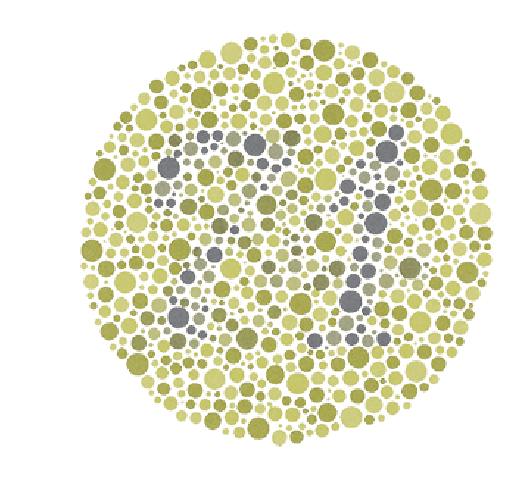

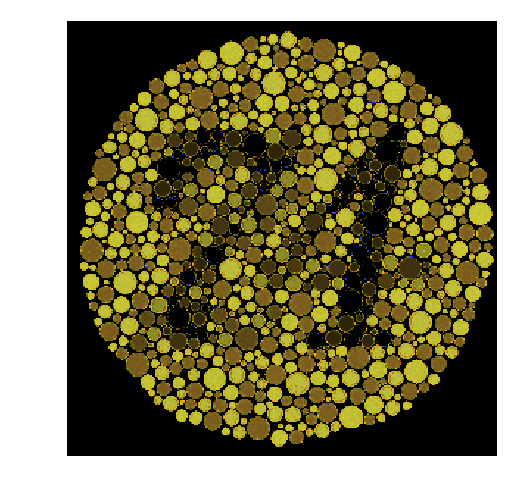

In [10]:
testColorBlind('Dataset/protanopiatest.png',10)